# Pandas 3
## Name: Daniel Perkins
## Class: MATH 403
## Date: 8/3/24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [59]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    data = pd.read_csv("college.csv", index_col=0)  # Load in data
    priv_publiv = data.groupby("Private")  # Group by private vs. public
    # print(priv_publiv.mean())
    sf_highest = priv_publiv["S.F.Ratio"].describe()["mean"].idxmax() # Do private universities have the highest S.F.Ratio?
    top10_highest = priv_publiv["Top10perc"].describe()["mean"].idxmax()  # Do private universities have more students in the top 10% of high school?
    top25_highest = priv_publiv["Top25perc"].describe()["mean"].idxmax()  # Do private universities have more students in the top 25% of high school?
    # Get the desired output
    ans_1 = priv_publiv["S.F.Ratio"].describe().loc[sf_highest].values
    ans_2 = priv_publiv["Top10perc"].describe().loc[top10_highest].values
    ans_3 = priv_publiv["Top25perc"].describe().loc[top25_highest].values
    return ans_1, ans_2, ans_3

In [60]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

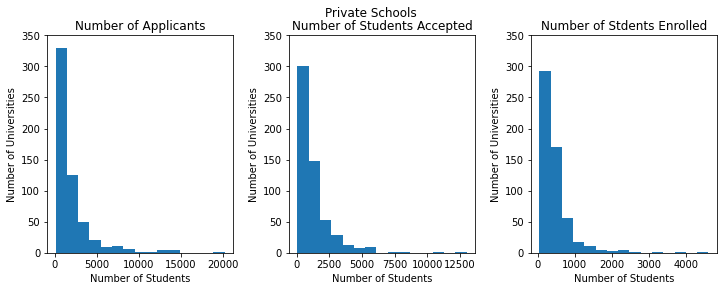

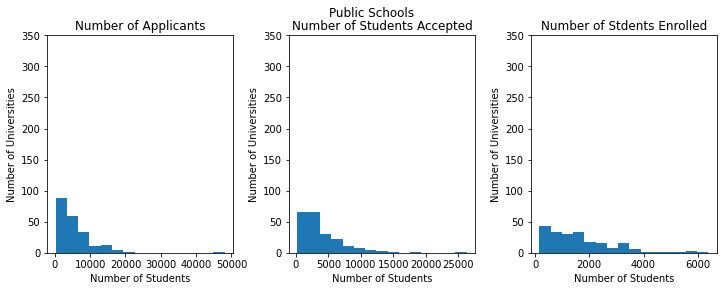

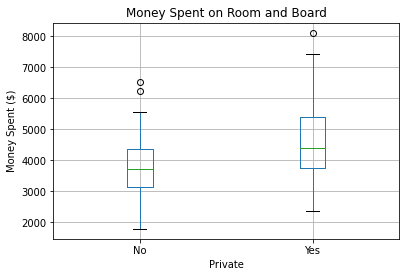

In [2]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    data = pd.read_csv("college.csv", index_col=0)  # Load in data
    # print(data.columns)
    priv_public = data.groupby("Private")  # Group by private vs. public
    titles = {"Apps": "Number of Applicants", "Accept": "Number of Students Accepted", "Enroll": "Number of Stdents Enrolled", "Room.Board": "Money Spent on Room and Board"}
    
    # Plots for private schools
    ax1 = priv_public.get_group("Yes").hist(column=["Apps", "Accept", "Enroll"], layout=(1,3), figsize=(12, 4), grid=False, bins=15)
    for ax in ax1.flatten():
        ax.set_ylim(0, 350)
        ax.set_title(titles[ax.get_title()]) # Reword titles
        ax.set_xlabel("Number of Students")
        ax.set_ylabel("Number of Universities")
    plt.suptitle("Private Schools")
    
    # Plots for public schools
    ax2 = priv_public.get_group("No").hist(column=["Apps", "Accept", "Enroll"], layout=(1,3), figsize=(12, 4), grid=False,bins=15)
    for ax in ax2.flatten():
        ax.set_ylim(0, 350)  # Match axes
        ax.set_title(titles[ax.get_title()])  # Reword titles
        ax.set_xlabel("Number of Students")
        ax.set_ylabel("Number of Universities")
    plt.suptitle("Public Schools")
    
    # Compare room and board box plot
    data.boxplot(["Room.Board"], by="Private", grid=True)
    plt.suptitle("")
    plt.title("Money Spent on Room and Board")
    plt.ylabel("Money Spent ($)")
prob2()

# Problem 3

In [32]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    data = pd.read_csv("Ohio_1999.csv", index_col=0)  # Load in data
    # print(data.columns)
    
    # Pivot by weekly earnings
    weekly_earnings = data.pivot_table(values="Yearly Salary", index="Race", columns="Sex", aggfunc=sum) // 52  # Divide by 52 weeks for each week in the year
    max_column = weekly_earnings.max().idxmax()
    max_row = weekly_earnings[max_column].idxmax()
    ans_1 = (max_row, max_column)
    
    # Pivot by usual hours worked (sum)
    usual_hours_worked = data.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc=sum)
    min_column = usual_hours_worked.min().idxmin()
    min_row = usual_hours_worked[min_column].idxmin()
    ans_2 = (min_row, min_column)
    
    # Pivot by usual hours worked (average)
    usual_hours_worked = data.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex")
    max_column = usual_hours_worked.max().idxmax()
    max_row = usual_hours_worked[max_column].idxmax()
    ans_3 = (max_row, max_column)
    
    return ans_1, ans_2, ans_3

In [31]:
print(prob3())

((1, 1), (3, 2), (3, 1))


# Problem 4

In [116]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    data = pd.read_csv("Ohio_1999.csv", index_col=0)  # Load in data
    # print(data.columns)
    
    # Pivot by education (use .5 values so that the correct numbers are included)
    # Randomly set values to "Usual Hours Worked" just so that it counts something
    degree_partition = pd.cut(data["Educational Attainment"], [0,38.5,42.5,46])
    degree = data.pivot_table(values="Usual Hours Worked", columns=degree_partition, aggfunc="count")
    ans_1 = degree.sum(axis=0).idxmax()
    
    # Pivot by age (only pd.cut() gives equally sized intervals)
    age_partition = pd.cut(data["Age"], bins=6)
    age = data.pivot_table(values="Usual Hours Worked", columns=age_partition)
    ans_2 = age.sum(axis=0).idxmax()
    
    # Pivot by both
    age_degree = data.pivot_table(values="Yearly Salary", index=degree_partition, columns=age_partition)
    min_age = age_degree.min().idxmin()
    min_degree = age_degree[min_age].idxmin()
    ans_3 = (min_age, min_degree)
    
    return ans_1, ans_2, ans_3

In [117]:
prob4()

(Interval(38.5, 42.5, closed='right'),
 Interval(39.0, 50.5, closed='right'),
 (Interval(73.5, 85.0, closed='right'), Interval(0.0, 38.5, closed='right')))

# Problem 5

In [164]:
def prob5():
   """
    Use College.csv to answer the following questions:
        1. Does the number of both private and public universities
           decrease as the percentage of alumni that donate
           increases, as expected?
        2. Is the partition with the greatest number of schools 
           the same for private and public universities?
        3. Is it true that the partition with the least average
           number of students from the top 10 percent of their
           high school class is the same for both private and
           public universities?
        4. The average percentage of students admitted from the
           top 10 percent of their high school class is very high
           in private universities with the lowest acceptance
           rates (< 25% acceptance rate). Why is this not a good
           conclusion to draw solely from this dataset? Use only 
           the data to explain why; do not extrapolate.

    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
   """
   data = pd.read_csv("college.csv", index_col=0)  # Load in data
   # print(data.columns)

   # Alumn partitions
   alumni_partition = pd.cut(data["perc.alumni"], [0, 20, 40, 60, 80, 100])
   private_public = data.pivot_table(values="Private", columns=alumni_partition, aggfunc="count")
   # print(private_public)
   ans_1 = True   # The number of universities decrease as the percentage of alumni that donate increases
    
   # Grad rate paritions
   grad_partition = pd.cut(data["Grad.Rate"], [0, 20, 40, 60, 80, 100])
   grad_rate = data.pivot_table(values="Grad.Rate", index="Private", columns=grad_partition, aggfunc="count")
   # print(grad_rate)
   ans_2 = False  # The partition with the greatest number of schools is not the same for private/public
   
   # Acceptance Rate partitions
   data["Acceptante Rate"] = data["Accept"] / data["Apps"]  # Create column for acceptance rate
   acc_rate_partition = pd.cut(data["Acceptante Rate"], [0, .25, .50, .75, 1])
   acc_rate = data.pivot_table(values="Top10perc", index="Private", columns=acc_rate_partition)
   # print(acc_rate)
   ans_3 = True  # the least average number of students from the top 10 percent of their high school class is the same for both private and public
   
   acc_rate_count = data.pivot_table(values="Top10perc", index="Private", columns=acc_rate_partition, aggfunc="count")
   # print(acc_rate_count)  # There is a very small amount of private schools with acceptance rate less than 25%
   ans_4 = """It is not good to conclude from this dataset that the average percentage of students admitted from the 
   top 10 percent of their high school class is very high in private universities with the lowest 
   acceptance rates. This is because there are only 4 private schools with acceptance rates less than 25%.
   Since the sample size is so small, the data is not statistically significant."""
   
   return ans_1, ans_2, ans_3, ans_4

In [165]:
prob5()

(True,
 False,
 True,
 'It is not good to conclude from this dataset that the average percentage of students admitted from the \n   top 10 percent of their high school class is very high in private universities with the lowest \n   acceptance rates. This is because there are only 4 private schools with acceptance rates less than 25%.\n   Since the sample size is so small, the data is not statistically significant.')